In [1]:
# modeling of individual pollutants
import statsmodels.tsa.api as tsa
import statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"F:\omdena-mumbai-chapter-air-quality\src\tasks\task-2-eda\final_powai_df.csv", index_col=0)
df.head()

,From Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Date
1,2021-01-01 00:00:00,79.18,116.33,0.36,10.86,11.22,7.79,5.72,0.41,107.72,2021-01-01
2,2021-01-01 00:15:00,75.00,107.00,0.53,9.04,9.58,7.64,5.52,0.41,104.27,2021-01-01
3,2021-01-01 00:30:00,75.00,107.00,1.02,10.77,11.79,7.78,6.18,0.53,98.05,2021-01-01
4,2021-01-01 00:45:00,75.00,107.00,1.47,17.84,19.33,8.12,6.69,0.60,86.91,2021-01-01
5,2021-01-01 01:00:00,76.40,107.44,1.46,17.81,19.28,8.57,6.40,0.59,83.05,2021-01-01


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76321 entries, 1 to 76321
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   From Date  76321 non-null  object 
 1   PM2.5      76321 non-null  float64
 2   PM10       76321 non-null  float64
 3   NO         76321 non-null  float64
 4   NO2        76321 non-null  float64
 5   NOx        76321 non-null  float64
 6   NH3        76321 non-null  float64
 7   SO2        76321 non-null  float64
 8   CO         76321 non-null  float64
 9   Ozone      76321 non-null  float64
 10  Date       76321 non-null  object 
dtypes: float64(9), object(2)
memory usage: 7.0+ MB


In [4]:
df.isnull().any()

From Date    False
PM2.5        False
PM10         False
NO           False
NO2          False
NOx          False
NH3          False
SO2          False
CO           False
Ozone        False
Date         False
dtype: bool

In [5]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone
count,76321.000000,76321.000000,76321.000000,76321.000000,76321.000000,76321.000000,76321.000000,76321.000000,76321.000000
mean,48.589556,92.203691,9.692436,20.382562,25.924529,4.450456,9.215890,0.646329,28.499424
std,35.014979,54.382158,11.790700,12.627772,20.765238,5.047033,12.037002,0.489995,35.955481
min,0.730000,5.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.440000,55.870000,2.090000,12.430000,9.410000,1.020000,1.150000,0.220000,1.660000
50%,44.567449,76.993327,7.290000,17.783457,23.350000,3.870000,4.880000,0.680000,14.320000
75%,68.000000,120.000000,10.600000,25.590000,38.590000,6.690000,10.670000,0.930000,42.390000
max,585.770000,587.200000,185.310000,148.270000,261.410000,342.670000,99.820000,3.940000,199.930000


- ACF test

In [6]:
auto_corr_array = tsa.stattools.acf(df['PM2.5'], nlags=10)
auto_corr_array

array([1.        , 0.97780873, 0.95259484, 0.92734031, 0.90425621,
       0.88355387, 0.86489445, 0.84626252, 0.8286732 , 0.81477857,
       0.80242772])

Above method shows auto_correlation with each lagged time-series

- Stationarity test

In [7]:
adfuller = tsa.stattools.adfuller(df['PM2.5'], maxlag=10, regression="ct", store=True)
adfuller

(-25.0227375332124,
 0.0,
 {'1%': -3.9588886407096857,
  '5%': -3.410547535295761,
  '10%': -3.1270838835203616},
 <statsmodels.stats.diagnostic.ResultsStore at 0x2438504ec40>)

- Time-series decomposition

In [8]:
ts_decompose = statsmodels.tsa.seasonal.seasonal_decompose(df['PM2.5'], model='multiplicative', period=96)


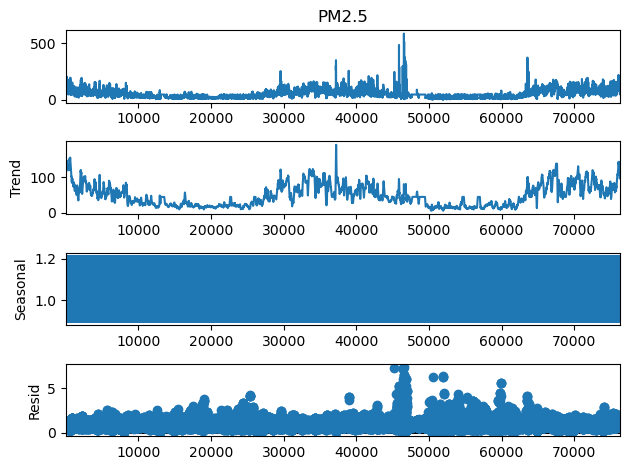

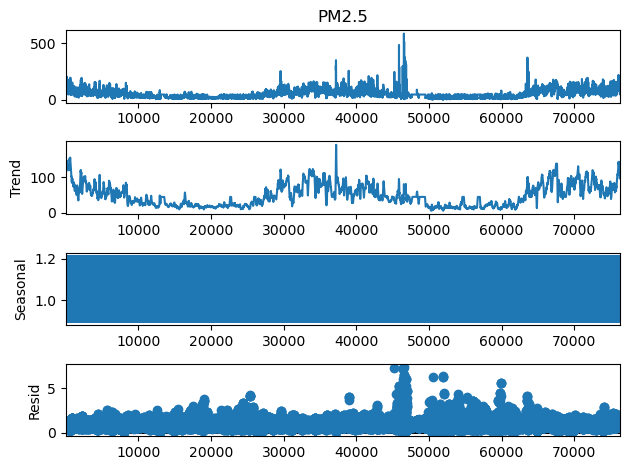

In [9]:
ts_decompose.plot()

- Auto-correlation and partial auto-correlation plots

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## plot the acf_plot

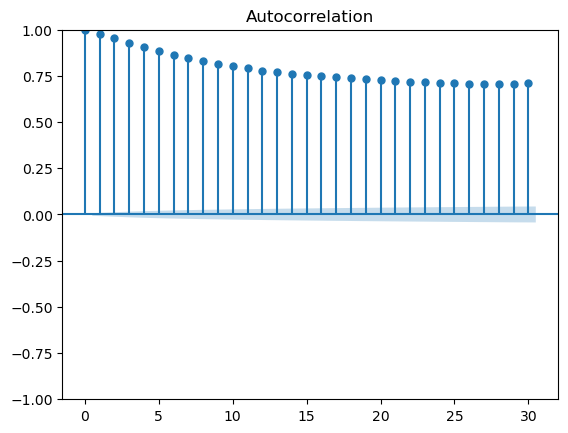

In [11]:
acf_plot = plot_acf(df['PM2.5'], lags=30)

We are not sure if time-series is stationary or non-stationary

- Differencing

In [12]:
df['PM2.5_Diff'] = df['PM2.5'] - df['PM2.5'].shift(1)

In [13]:
df.head()

,From Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Date,PM2.5_Diff
1,2021-01-01 00:00:00,79.18,116.33,0.36,10.86,11.22,7.79,5.72,0.41,107.72,2021-01-01,NaN
2,2021-01-01 00:15:00,75.00,107.00,0.53,9.04,9.58,7.64,5.52,0.41,104.27,2021-01-01,-4.18
3,2021-01-01 00:30:00,75.00,107.00,1.02,10.77,11.79,7.78,6.18,0.53,98.05,2021-01-01,0.00
4,2021-01-01 00:45:00,75.00,107.00,1.47,17.84,19.33,8.12,6.69,0.60,86.91,2021-01-01,0.00
5,2021-01-01 01:00:00,76.40,107.44,1.46,17.81,19.28,8.57,6.40,0.59,83.05,2021-01-01,1.40


<AxesSubplot: >

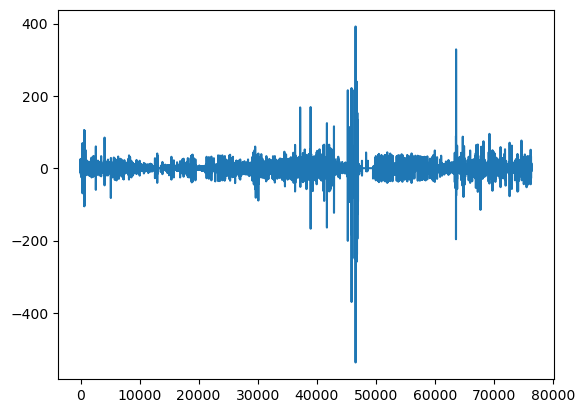

In [14]:
df['PM2.5_Diff'].plot()

c:\Users\Avi\.conda\envs\mlcollab\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


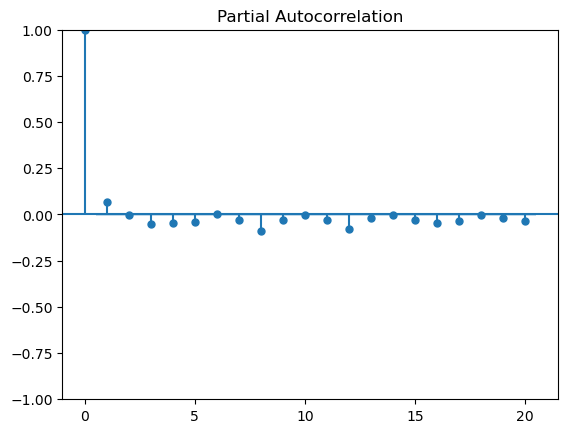

In [15]:
# plot the pacf plot for PM2.5_Diff 
pacf_plot = plot_pacf(df['PM2.5_Diff'].dropna(), lags=20)

- Here, we have differencing factor of 1 as Pacf immediatly cuts off to zero.

## ARIMA model

- We will build ARIMA model of order  (1,1,1) as we have differencing factor of 1

In [16]:
from statsmodels.tsa.arima.model import ARIMA

pm25_train = df['PM2.5'][:60000]
pm25_test = df['PM2.5'][60000:]

C:\Users\Avi\AppData\Local\Temp\ipykernel_27144\4164358965.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  pm25_train = df['PM2.5'][:60000]
C:\Users\Avi\AppData\Local\Temp\ipykernel_27144\4164358965.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  pm25_test = df['PM2.5'][60000:]


In [17]:
arima = ARIMA(pm25_train.astype(np.float64), order=(1,1,1))
arima_model = arima.fit()
arima_model.summary()

c:\Users\Avi\.conda\envs\mlcollab\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Avi\.conda\envs\mlcollab\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Avi\.conda\envs\mlcollab\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  PM2.5   No. Observations:                60000
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -205908.921
Date:                Sat, 25 Mar 2023   AIC                         411823.842
Time:                        18:32:22   BIC                         411850.848
Sample:                             0   HQIC                        411832.230
                              - 60000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0415      0.118      0.350      0.726      -0.190       0.273
ma.L1         -0.0158      0.118     -0.134      0.894      -0.248       0.216
sigma2        56.0285      0.020   2764.185      0.000      55.989      56.068
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):        2338270286.36
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.32   Skew:                            -6.11
Prob(H) (two-sided):                  0.00   Kurtosis:                       970.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
# predict and calculate RMSE
predictions = arima_model.forecast(steps=20)

c:\Users\Avi\.conda\envs\mlcollab\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [19]:
predictions

60000    3.999971
60001    3.999970
60002    3.999970
60003    3.999970
60004    3.999970
60005    3.999970
60006    3.999970
60007    3.999970
60008    3.999970
60009    3.999970
60010    3.999970
60011    3.999970
60012    3.999970
60013    3.999970
60014    3.999970
60015    3.999970
60016    3.999970
60017    3.999970
60018    3.999970
60019    3.999970
Name: predicted_mean, dtype: float64

## Regression based model

In [20]:
df['pm2.5_autoreg'] = df['PM2.5'].shift(1)

In [21]:
df.head()

,From Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Date,PM2.5_Diff,pm2.5_autoreg
1,2021-01-01 00:00:00,79.18,116.33,0.36,10.86,11.22,7.79,5.72,0.41,107.72,2021-01-01,NaN,NaN
2,2021-01-01 00:15:00,75.00,107.00,0.53,9.04,9.58,7.64,5.52,0.41,104.27,2021-01-01,-4.18,79.18
3,2021-01-01 00:30:00,75.00,107.00,1.02,10.77,11.79,7.78,6.18,0.53,98.05,2021-01-01,0.00,75.00
4,2021-01-01 00:45:00,75.00,107.00,1.47,17.84,19.33,8.12,6.69,0.60,86.91,2021-01-01,0.00,75.00
5,2021-01-01 01:00:00,76.40,107.44,1.46,17.81,19.28,8.57,6.40,0.59,83.05,2021-01-01,1.40,75.00


In [22]:
# modeling using regression method and autoregression
model_df = df[['PM2.5','pm2.5_autoreg']].dropna()

In [23]:
# split the data without shuffling
ts_train = model_df[:60000]
ts_test = model_df[60000:]

In [25]:
# split the train and test dataset
X_train = ts_train['pm2.5_autoreg']
y_train = ts_train['PM2.5']

X_test = ts_test['pm2.5_autoreg']
y_test = ts_test['PM2.5']

In [42]:
# import linear model
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(np.array(X_train).reshape(-1,1),y_train)

LinearRegression()

In [46]:
# predictions
preds = lr_model.predict(np.array(X_test).reshape(-1,1))

In [47]:
# measure the performance
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# calculate MAPE
mape = mean_absolute_percentage_error(y_test, preds)
# calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, preds))
# calculate R-squared
r2 = r2_score(y_test, preds)

In [48]:
print("MAPE: ", mape)
print("RMSE: ", rmse)
print("R-squared: ", r2)

MAPE:  0.0530944401149785
RMSE:  6.936109326542781
R-squared:  0.9626476259804715


In [64]:
predss = pd.Series(preds, index=y_test.index)

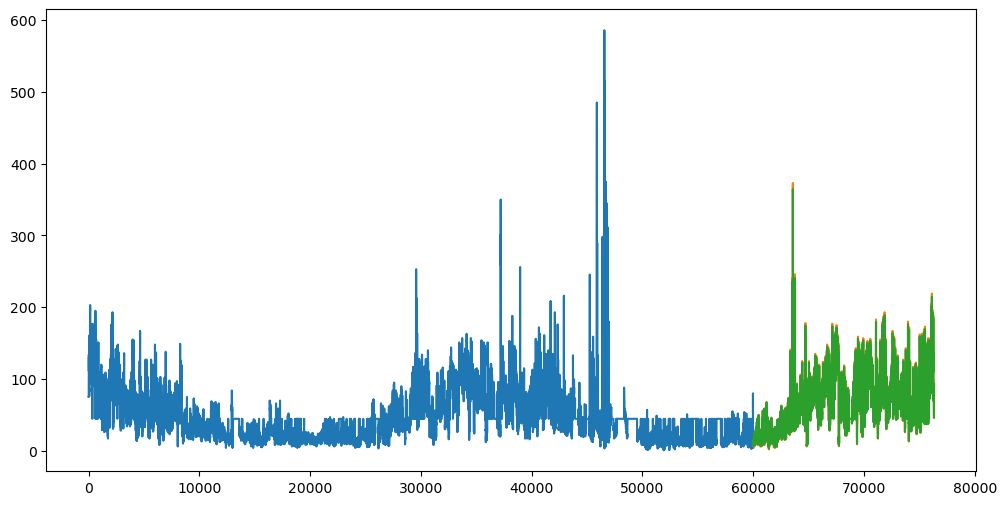

In [65]:
# plot the graph
plt.figure(figsize=(12,6))
plt.plot(y_train)
plt.plot(y_test)
plt.plot(predss)